In [86]:
#ЗАДАНИЕ 4.4.15
import numpy as np
import matplotlib.pyplot as plt

In [87]:
#данные для системы
def B(t):
    return [[0.01,0.12,0.5,-0.1],[-0.1,-0.15,-0.01,-0.4],[0.15,t**2,0.3,0.2],[0,-0.1,0.25,0.1]]
c=[3,2,1,0]

In [88]:
norm = lambda t: np.linalg.norm(B(t),np.inf) #норма ||B||inf
t_range = np.arange(-1, 1.2, 0.2)
arr_norm = np.array(list(map(func, t_range)))
arr_norm #значение нормы для разных параметров t

array([1.65, 1.29, 1.01, 0.81, 0.73, 0.73, 0.73, 0.81, 1.01, 1.29, 1.65])

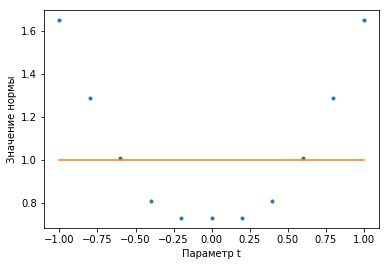

In [89]:
#построим график
plt.xlabel('Параметр t')
plt.ylabel('Значение нормы')
plt.plot(t_range,arr_norm, '.') #значения нормы от параметра
plt.plot((-1,1),(1,1)) #прямая y=1, чтобы проверить, какие значения t удовлетворяют условию ||B||<1
plt.show()

In [90]:
#достаточное условие выполнено для t=-0.4,-0.2,0,0.2,0.4
#наибольшее значение параметра t=0.4, ищем решение системы x=Bx+c для него
B=np.array([[0.01,0.12,0.5,-0.1],[-0.1,-0.15,-0.01,-0.4],[0.15,0.4**2,0.3,0.2],[0,-0.1,0.25,0.1]])

In [91]:
#Модифицированный метод Зейделя для решения системы

#Получение верхней треугольной матрицы В2
import copy
def B2(B):
    r=B.shape[0]
    result = copy.copy(B)
    for i in range(r):
        for j in range (i+1):
            result[i,j]=0
    return result

def zmod(B,c,x0,eps): #функция для модифицированного метода Зейделя
    y=np.array(x0)
    x=np.zeros(4)
    #ε2=ε*(1-‖B‖)/‖B2‖
    eps2=(eps*(1-np.linalg.norm(B,np.inf))/np.linalg.norm(B2(B),np.inf)) 
    while (max(abs(x-y))>eps2):
        x=np.array(y)
        for i in range(n):
            u=0
            j=0
            while (j>=0) and (j<=i):
                u+=B[i,j]*y[j]
                j+=1
            j=i+1
            while (j>=i) and (j<n):
                u+=B[i,j]*x[j]
                j+=1
            y[i]=u+c[i]
    return y

In [92]:
x0=[4.0,2.0,3.0,0.0]
z=zmod(B,c,x0,10**(-5))
z

array([4.52837844, 1.08849707, 2.83845508, 0.66751553])